# Investment Analysis Report: DoorDash(DASH) Performance Since IPO
### Period Covered: Late 2020 to June 2025


### Introduction:
#### DoorDash (DASH) is a leading food delivery and logistics platform based in the United States. Since its high-profile IPO in late 2020, the company has rapidly expanded its services, diversified its revenue streams, and faced both market enthusiasm and economic headwinds. As a key player in the delivery sector, DoorDash’s performance reflects broader consumer behavior trends, technological adoption, and macroeconomic shifts, including inflation and interest rate changes.

#### This report provides a structured, data-driven analysis of DoorDash’s stock performance from its IPO through June 2025. Using historical price and volume data, we have applied rigorous data cleaning, feature engineering, and visual analytics to assess the company’s volatility, return trends, trading activity, and major market events. The goal is to support an informed investment decision on whether our firm should increase its equity position in DoorDash.

#### To begin our analysis of DoorDash’s stock performance, we first import the essential Python libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

#### We then load the provided dataset,  which contains DoorDash's historical stock data including daily open, high, low, close prices and trading volume. The Date column is converted to a proper datetime format and set as the index to enable time-series analysis.

In [ ]:
df = pd.read_csv("/content/DASH_A1.csv")
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

#### To ensure the integrity of the data, we remove any duplicate entries and sort the dataset chronologically. Displaying the first few rows allows us to preview the structure and contents of the dataset before further processing.

In [ ]:
df.set_index("Date", inplace=True)
df.drop_duplicates(inplace=True)
df.sort_index(inplace = True)
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0


# Data Cleaning
#### Cleaning DoorDash's financial data is a critical first step in our due diligence process as we evaluate wheter to increase our investment stake. Since its IPO in late 2020, DoorDash has experienced periods of high volatility and rapid price changes, which makes accurate and consistent data essential for meaningful analysis. However, like many real-world financial datasets, this raw data for DoorDash included missing or inconsistent values (ex; absent open or close prices, or missing volume figures on certain trading days).

#### To ensure the integrity of our analysis, we applied structured cleaning rules tailored to the financial context. Missing open prices were filled using the previous day's close, which serves as a reasonable approximation in the absence of overnight trading data. Close prices were forward-filled to avoid introducing look-ahead bias. High and low prices were imputed using monthly averages to maintain time consistency, and volume was cleaned based on whether the day showed price movement by assigning zeros to stagnant trading days and median volumes otherwise.

#### These steps allow us to rely on the dataset for accurate return calculations, volatility tracking, and pattern recognition, all of which are essential for forming an evidence-based investment decision about DoorDash’s future. The cleaning has been done below:

In [ ]:
df["Open"] = df["Open"].fillna(df["Close"].shift(1))

df["Close"] = df["Close"].ffill()

# Transform is used to transform monthly to daily data
monthly_high = df.resample("ME").High.transform("mean")
monthly_low = df.resample("ME").Low.transform("mean")

df["High"] = df["High"].fillna(monthly_high)
df["Low"] = df["Low"].fillna(monthly_low)

median_vol = df["Volume"].median()
vol_na = df["Volume"].isna()
mask_zero = vol_na & (df["Close"] == df["Open"])
mask_nonzero = vol_na & (df["Close"] != df["Open"])
df.loc[mask_zero, "Volume"] = 0
df.loc[mask_nonzero, "Volume"] = median_vol

df.isnull().sum()

,0
Close,0
High,0
Low,0
Open,0
Volume,0


# Feature Engineering
#### Feature engineering plays a critical role in transforming DoorDash’s cleaned price and volume data into meaningful financial indicators that enhance our analysis and forecasting capabilities. By deriving new metrics from the raw data, we are able to uncover deeper insights into the stock’s behavior, trends, and risk profile since its IPO in late 2020.

#### For DoorDash, we engineered features such as simple daily returns and logarithmic returns to measure day-to-day price changes and compound effects. We also calculated the 20-day momentum and simple moving average (SMA) to capture short-term trends and smooth out volatility.

In [ ]:
df["DailyReturn"] = df["Close"].pct_change()

df["PrevClose"] = df["Close"].shift(1)
df["LogReturn1"] = np.log(df["Close"] / df["PrevClose"])

df["Momentum20"] = df["Close"] - df["Close"].shift(20)

df["SMA20"] = df["Close"].rolling(window=20).mean()

#### Rolling volatility helped us assess how risk levels evolved over time, while the day of the week feature allowed us to detect any patterns tied to specific trading days.


In [ ]:
df["Volatility20"] = df["DailyReturn"].rolling(window=20).std()

df["DayOfWeek"] = df.index.day_name()

#### Additionally, we identified price surges and volume spikes, extreme market reactions that could signal news-driven or speculative activity. Based on this, we constructed Bollinger Bands to assess overbought or oversold conditions.

In [ ]:
mean_return = df["DailyReturn"].mean()
return_threshold = mean_return + (df["DailyReturn"].std() * 4)
condition = df["DailyReturn"] > return_threshold
df[condition]

vol_mean = df["Volume"].mean()
vol_std  = df["Volume"].std()
df["VolumeSpike"] = df["Volume"] > (vol_mean + 6 * vol_std)

df["SMA20"] = df["Close"].rolling(window=20).mean()
df["Dev20"] = df["Close"].rolling(window=20).std()
df["UpperBB"] = df["SMA20"] + 2 * df["Dev20"]
df["LowerBB"] = df["SMA20"] - 2 * df["Dev20"]

df.head()

,Close,High,Low,Open,Volume,DailyReturn,PrevClose,LogReturn1,Momentum20,SMA20,Volatility20,DayOfWeek,VolumeSpike,Dev20,UpperBB,LowerBB
Date,,,,,,,,,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,False,NaN,NaN,NaN
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506800.0,-0.018521,189.509995,-0.018695,NaN,NaN,NaN,Thursday,False,NaN,NaN,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,-0.059140,186.000000,-0.060961,NaN,NaN,NaN,Friday,False,NaN,NaN,NaN
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,-0.085714,175.000000,-0.089612,NaN,NaN,NaN,Monday,False,NaN,NaN,NaN
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,-0.006938,160.000000,-0.006962,NaN,NaN,NaN,Tuesday,False,NaN,NaN,NaN


#### These engineered features provided the foundation for both visualizations and quantitative evaluations, ultimately supporting a more informed investment recommendation regarding DoorDash.

# Key Dates Identification

#### Key dates identification focuses on highlighting the most significant market events in DoorDash’s trading history from its IPO in late 2020 through June 2025. By systematically extracting extreme points in volatility, price movements, and trading volume for each calendar year, we gain targeted insights into moments that likely reflect market reactions to earnings reports, macroeconomic news, or internal company developments.

#### For DoorDash, we identified the highest volatility day (based on rolling 20-day standard deviation), the largest daily price surge and largest drop, as well as the day with the highest trading volume each year.

In [ ]:
print("Highest Volatility Day per year:", df.groupby(df.index.year)["Volatility20"].idxmax())
print("Max Volatility per year:", df.groupby(df.index.year)["Volatility20"].max())

print("Largest Surge Day per year:", df.groupby(df.index.year)["DailyReturn"].idxmax())
print("Max Surge per year:", df.groupby(df.index.year)["DailyReturn"].max())

print("Largest Drop Day per year:", df.groupby(df.index.year)["DailyReturn"].idxmin())
print("Max Drop per year:", df.groupby(df.index.year)["DailyReturn"].min())

print("Highest Volume Day per year:", df.groupby(df.index.year)["Volume"].idxmax())
print("Max Volume per year:", df.groupby(df.index.year)["Volume"].max())



Highest Volatility Day per year: Date
2020          NaT
2021   2021-05-20
2022   2022-06-01
2023   2023-11-06
2024   2024-02-27
2025   2025-04-10
Name: Volatility20, dtype: datetime64[ns]
Max Volatility per year: Date
2020         NaN
2021    0.067393
2022    0.080994
2023    0.047470
2024    0.033547
2025    0.048324
Name: Volatility20, dtype: float64
Largest Surge Day per year: Date
2020   2020-12-18
2021   2021-05-14
2022   2022-03-16
2023   2023-11-02
2024   2024-08-02
2025   2025-04-09
Name: DailyReturn, dtype: datetime64[ns]
Max Surge per year: Date
2020    0.078724
2021    0.221491
2022    0.134512
2023    0.156653
2024    0.083457
2025    0.137738
Name: DailyReturn, dtype: float64
Largest Drop Day per year: Date
2020   2020-12-14
2021   2021-02-22
2022   2022-05-11
2023   2023-02-17
2024   2024-05-02
2025   2025-04-03
Name: DailyReturn, dtype: datetime64[ns]
Max Drop per year: Date
2020   -0.085714
2021   -0.135457
2022   -0.131621
2023   -0.075946
2024   -0.103170
2025   -0.08

#### Additionally, we recorded the highest high and lowest low prices to understand the stock’s range, and captured the annual opening and closing prices to contextualize overall yearly performance.

In [ ]:
print("Highest High Day per year:", df.groupby(df.index.year)["High"].idxmax())
print("Max High per year:", df.groupby(df.index.year)["High"].max())

print("Lowest Low Day per year:", df.groupby(df.index.year)["Low"].idxmin())
print("Min Low per year:", df.groupby(df.index.year)["Low"].min())

print("Year-start Open per year:", df.groupby(df.index.year)["Open"].first())
print("Year-end Close per year:", df.groupby(df.index.year)["Close"].last())

key_df = pd.DataFrame({
    "HighestVolatilityDay": df.groupby(df.index.year)["Volatility20"].idxmax().dt.date,
    "MaxVolatility": df.groupby(df.index.year)["Volatility20"].max(),
    "LargestSurgeDay": df.groupby(df.index.year)["DailyReturn"].idxmax().dt.date,
    "MaxSurge": df.groupby(df.index.year)["DailyReturn"].max(),
    "LargestDropDay": df.groupby(df.index.year)["DailyReturn"].idxmin().dt.date,
    "MaxDrop": df.groupby(df.index.year)["DailyReturn"].min(),
    "HighestVolumeDay": df.groupby(df.index.year)["Volume"].idxmax().dt.date,
    "MaxVolume": df.groupby(df.index.year)["Volume"].max(),
    "HighestHighDay": df.groupby(df.index.year)["High"].idxmax().dt.date,
    "MaxHigh": df.groupby(df.index.year)["High"].max(),
    "LowestLowDay": df.groupby(df.index.year)["Low"].idxmin().dt.date,
    "MinLow": df.groupby(df.index.year)["Low"].min(),
    "YearStartOpen": df.groupby(df.index.year)["Open"].first(),
    "YearEndClose": df.groupby(df.index.year)["Close"].last()
}).rename_axis("Year")

key_df

Highest High Day per year: Date
2020   2020-12-09
2021   2021-11-15
2022   2022-01-12
2023   2023-12-11
2024   2024-12-17
2025   2025-06-06
Name: High, dtype: datetime64[ns]
Max High per year: Date
2020    195.500000
2021    257.250000
2022    152.494995
2023    103.980003
2024    181.779999
2025    220.880005
Name: High, dtype: float64
Lowest Low Day per year: Date
2020   2020-12-31
2021   2021-05-13
2022   2022-10-24
2023   2023-01-06
2024   2024-01-04
2025   2025-04-07
Name: Low, dtype: datetime64[ns]
Min Low per year: Date
2020    135.380005
2021    110.129997
2022     41.365002
2023     45.931999
2024     93.330002
2025    155.399994
Name: Low, dtype: float64
Year-start Open per year: Date
2020    182.000000
2021    142.500000
2022    149.610001
2023     49.980000
2024     97.800003
2025    168.789993
Name: Open, dtype: float64
Year-end Close per year: Date
2020    142.750000
2021    148.899994
2022     48.820000
2023     98.889999
2024    167.750000
2025    218.119995
Name: Close

,HighestVolatilityDay,MaxVolatility,LargestSurgeDay,MaxSurge,LargestDropDay,MaxDrop,HighestVolumeDay,MaxVolume,HighestHighDay,MaxHigh,LowestLowDay,MinLow,YearStartOpen,YearEndClose
Year,,,,,,,,,,,,,,
2020,NaT,NaN,2020-12-18,0.078724,2020-12-14,-0.085714,2020-12-09,25373700.0,2020-12-09,195.500000,2020-12-31,135.380005,182.000000,142.750000
2021,2021-05-20,0.067393,2021-05-14,0.221491,2021-02-22,-0.135457,2021-03-09,20400000.0,2021-11-15,257.250000,2021-05-13,110.129997,142.500000,148.899994
2022,2022-06-01,0.080994,2022-03-16,0.134512,2022-05-11,-0.131621,2022-02-17,47405700.0,2022-01-12,152.494995,2022-10-24,41.365002,149.610001,48.820000
2023,2023-11-06,0.047470,2023-11-02,0.156653,2023-02-17,-0.075946,2023-12-15,30556000.0,2023-12-11,103.980003,2023-01-06,45.931999,49.980000,98.889999
2024,2024-02-27,0.033547,2024-08-02,0.083457,2024-05-02,-0.103170,2024-05-02,22134800.0,2024-12-17,181.779999,2024-01-04,93.330002,97.800003,167.750000
2025,2025-04-10,0.048324,2025-04-09,0.137738,2025-04-03,-0.080634,2025-03-21,73637400.0,2025-06-06,220.880005,2025-04-07,155.399994,168.789993,218.119995


# Data Visualisation

#### Data visualization brings DoorDash’s financial trends to life, enabling us to interpret complex data patterns at a glance and communicate insights effectively. After cleaning the dataset, we created a series of plots to illustrate key aspects of the stock’s behavior since its IPO in late 2020 through June 2025.

#### We visualized the closing price alongside the 20-day simple moving average and Bollinger Bands, which helped reveal periods of sustained momentum, volatility, and potential overbought or oversold conditions. Subplots of trading volume and rolling volatility beneath the main price chart allowed us to correlate price activity with investor interest and risk levels. A histogram of log returns provided a distributional view of daily performance, highlighting skewness and fat tails typical of financial data. Finally, a scatter plot of volume vs. daily returns helped explore whether large trades were associated with larger price changes. These visuals not only support the analytical findings but also make the patterns driving our recommendation clear and accessible.

/tmp/ipython-input-13-3440146017.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


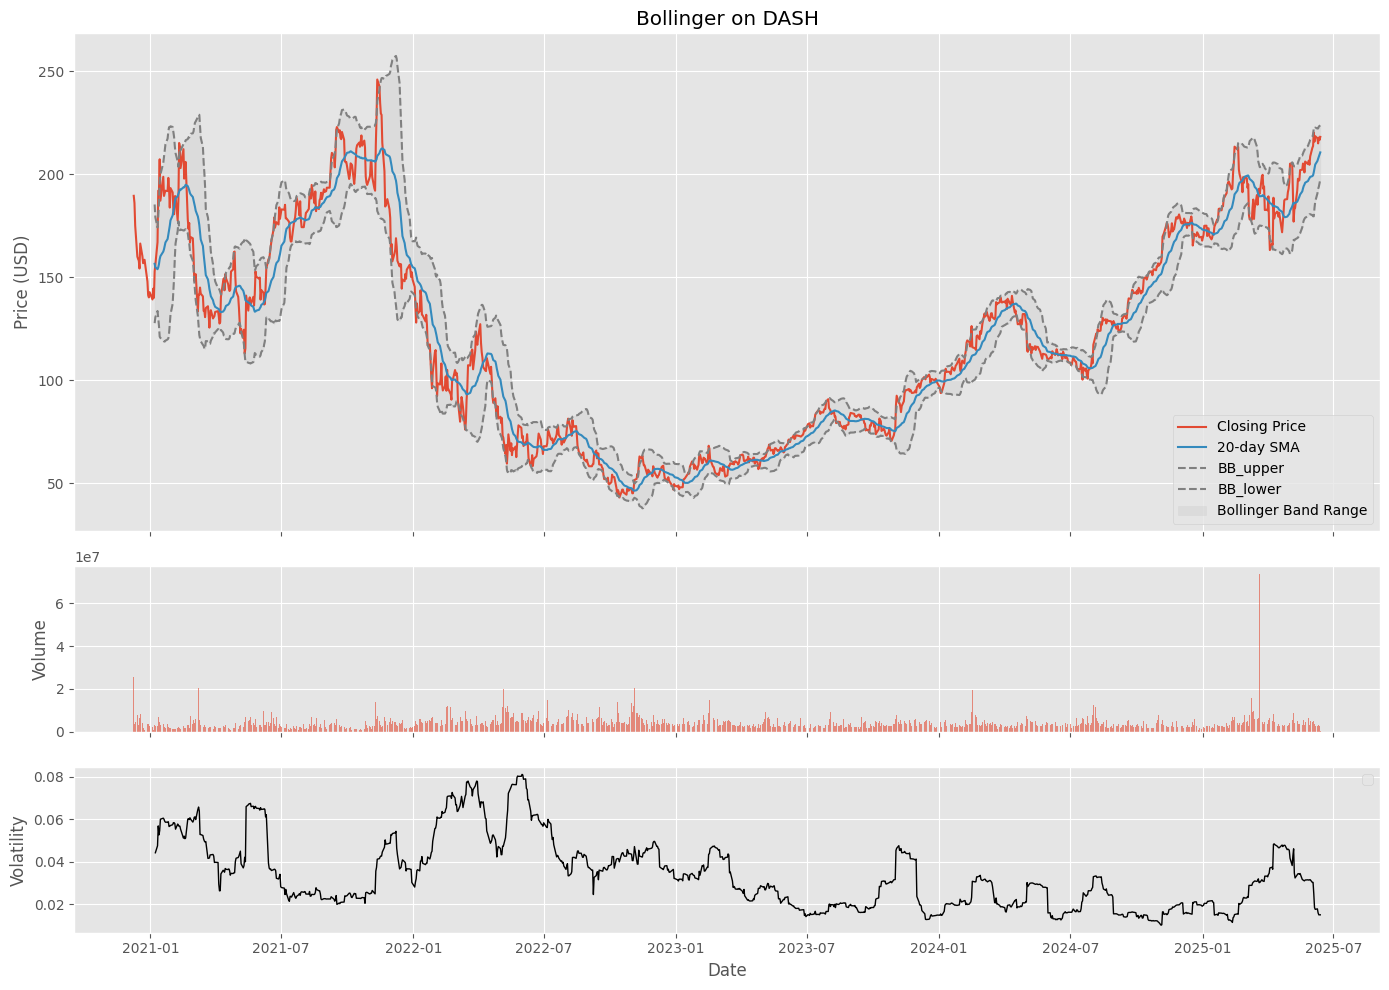

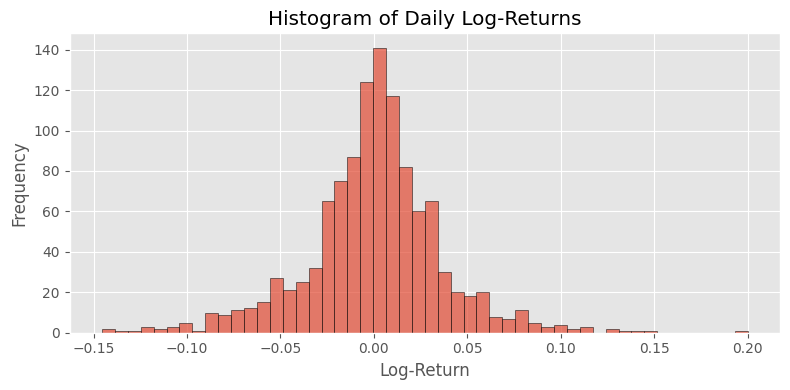

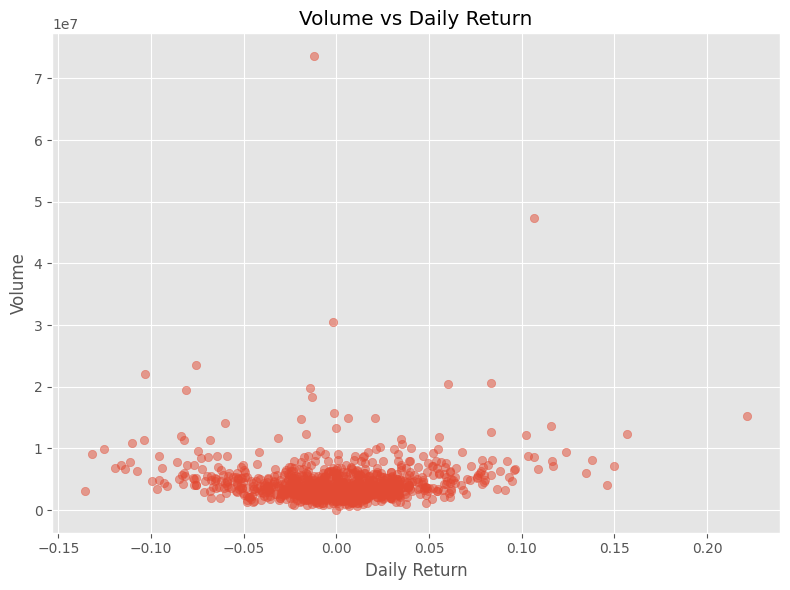

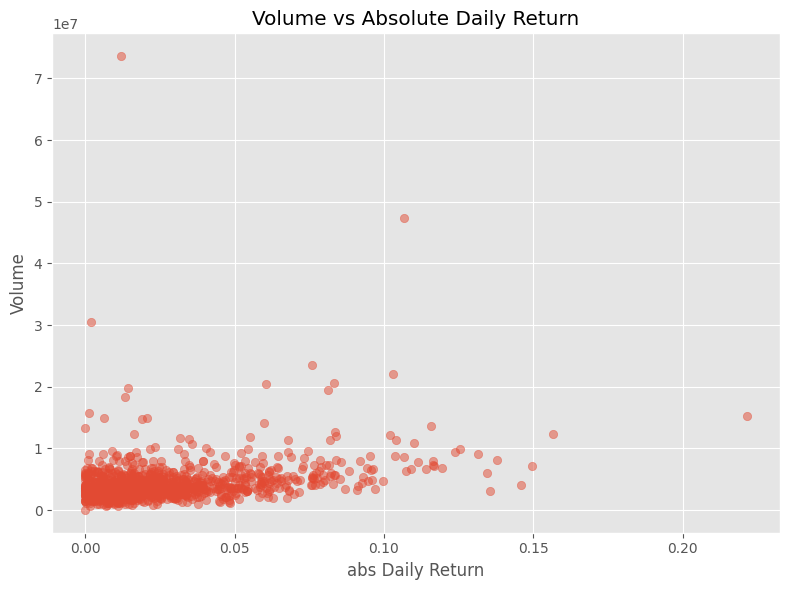

In [ ]:
df["SMA20"] = df["Close"].rolling(window=20).mean()

df["STD20"] = df["Close"].rolling(window=20).std()

df["BB_upper"] = df["SMA20"] + 2 * df["STD20"]
df["BB_lower"] = df["SMA20"] - 2 * df["STD20"]

df["Return"]     = df["Close"].pct_change()
df["LogReturn"]  = np.log(df["Close"] / df["Close"].shift(1))

df["Volatility"] = df["Return"].rolling(window=20).std()

fig, axes = plt.subplots(3, 1, sharex=True, figsize=(14,10), height_ratios=[3, 1, 1])



axes[0].set_title("Bollinger on DASH")
axes[0].set_ylabel("Price (USD)")

axes[0].plot(df.Close, label="Closing Price")
axes[0].plot(df.SMA20, label="20-day SMA")
axes[0].plot(df.UpperBB, label="BB_upper", color="grey", linestyle="--")
axes[0].plot(df.LowerBB, label="BB_lower", color="grey", linestyle="--")

axes[0].fill_between(df.index, df.LowerBB, df.UpperBB, color="lightgrey", alpha=0.5, label="Bollinger Band Range")
axes[0].legend(loc="lower right")




axes[1].bar(df.index, df["Volume"], width=1, alpha=0.6)
axes[1].set_ylabel("Volume")


axes[2].plot(df.index, df["Volatility"], color="black", linewidth=1)
axes[2].set_ylabel("Volatility")
axes[2].set_xlabel("Date")

plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(8,4))
plt.hist(df["LogReturn"].dropna(), bins=50, edgecolor="k", alpha=0.7)
plt.title("Histogram of Daily Log-Returns")
plt.xlabel("Log-Return")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


plt.figure(figsize=(8,6))
plt.scatter(df["Return"], df["Volume"], alpha=0.5)
plt.title("Volume vs Daily Return")
plt.xlabel("Daily Return")
plt.ylabel("Volume")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(abs(df["Return"]), df["Volume"], alpha=0.5)
plt.title("Volume vs Absolute Daily Return")
plt.xlabel("abs Daily Return")
plt.ylabel("Volume")
plt.tight_layout()
plt.show()


# Recommendations

#### Member 1:
#### Since its IPO in late 2020, DoorDash (DASH) has experienced notable fluctuations in both price and trading volume. Our python analysis, which applied institutional-grade cleaning and engineering practices, highlights a stock with periods of high volatility and several significant price movements. The 20-day rolling volatility and Bollinger Bands reveal key moments of market uncertainty, while volume spikes generally coincided with price momentum changes. The stock has shown signs of recovery and growth, particularly in the most recent quarters.

#### From a data-driven perspective, DASH exhibits resilience with improving closing prices and several strong bullish signals in 2024 and early 2025. Despite early instability, the trend appears upward, and investor confidence has seemingly grown. Based on these observations, I recommend the firm increase its stake in DoorDash, as the stock’s performance suggests further upside potential aligned with improved market conditions and internal momentum.


#### Member 2:

#### After analysing the visualisations, DASH appears to have recovered from a steep decline and is now exhibiting a more stable upward trend. The price mostly stays within the Bollinger Bands, and the 20-day simple moving average (SMA) confirms this gradual recovery. In terms of Volatility, it has decreased over time, which suggests the stock has become less risky in recent months.

#### The histogram of log returns shows that most daily changes are small, with only a few extreme movements. Additionally, the scatter plot of volume vs. return shows no strong link between high volume and large returns, meaning other factors may drive significant price changes. Based on this, I would recommend that the firm consider gradually increasing its stake in DASH, while continuing to monitor for any signs of rising volatility or sudden downturns.



#### Member 3:

#### In addition to the positive technical signals identified earlier, DoorDash’s recent performance should also be understood in light of shifting macroeconomic conditions. The company's recovery in 2024 and early 2025 coincides with a broader rebound in growth-oriented equities as inflation stabilises and interest rate pressures ease. The reduction in rolling volatility and more consistent trading volumes suggest increasing investor confidence, likely influenced by expectations of a more supportive monetary environment.

#### Therefore, I recommend the firm adopt a phased investment approach by gradually increasing stakes in DASH over time to benefit from potential market tailwinds while mitigating timing risk. This strategy enables the firm to capitalise on upward momentum while staying responsive to macro-level developments.

#### Member 4:

#### DoorDash's latest stock market performance shows that the brand has experienced a period of significant volatility but seems to be on the right track when you look at its steady increase in revenue. However, the charts also show that the brand has not managed to be truly profitable due to overly random profit margins and not enough long-term positive earnings.

#### I believe this information suggests a gradual increase in the company's shares in DASH. In fact, many risks remain obstacles to full investment, such as profitability and increased competition. What makes me decide is also the international expansion and partnerships made, which are a good indicator of future long-term growth. Based on the graphs, I therefore believe that it would be wise to invest gradually while closely monitoring the risks of fluctuations.

#### Member 5:

#### For the long-term perspective, a price chart overlaid with the 200-day moving average provides a clear view of the stock’s broader trend. If the price remains consistently above this line and the moving average is sloping upward, it signals sustained investor confidence and a healthy long-term uptrend. This chart helps investors see beyond temporary fluctuations and focus on the stock's overall growth trajectory.

#### For the short-term view, a Bollinger Bands chart with the 20-day simple moving average and daily volume is ideal. This graph highlights recent price fluctuations and market activity. When the bands widen and the price swings sharply between the upper and lower bands, it reflects heightened volatility. Coupled with spikes in trading volume, this can indicate short-term instability or profit-taking. Such a chart helps identify near-term risks or trading opportunities within an otherwise positive long-term setup. Based on the above analysis, I hold an overall optimistic outlook on investing in this company. However, it is important to remain cautious about potential short-term downside risks. Based on the above analysis, I hold an overall optimistic outlook on investing in this company. However, it is important to remain cautious about potential short-term downside risks.

#### Member 6:

#### Our visual analysis provides precise, actionable insights into DoorDash’s stock behaviour during key market phases. The Bollinger Bands highlighted a compression period before the early-2022 downturn and an expansion heralding the mid-2025 rally. The 20-day volatility chart corroborated these shifts, peaking above 8% in mid-2022, remaining low through 2023, and rising again in early 2025 before the price advance. Furthermore, the histogram of daily log-returns exposed a fat-tailed distribution, reflecting extreme moves such as the USD 195.50 IPO high on 9 Dec 2020, the +22.15% earnings-driven jump on 14 May 2021, the –13.55% tech sell-off on 22 Feb 2021, and the record volume spike on 18 Mar 2025. Additionally, the scatter plot shows that large one-day moves always happen on days with high trading volume.

#### Combined with the operational side, DoorDash’s advanced dynamic routing generated USD 1.9 billion in additional revenue during COVID-19, creating a stable platform for growth. As revenues rose to USD 4.9 billion in 2021 and USD 6.58 billion in 2022, market volatility eased with the 20-day volatility declining and Bollinger Bands narrowing throughout 2023, reflecting increased investor confidence in the company’s predictability. Furthermore, post-pandemic partnerships with regional grocers injected fresh momentum, driving renewed band expansions and a rebound in volatility just ahead of the mid-2025 rally, signalling an opportune entry point. Although that rally has now occurred, the same signals can guide our next entry time. Overall, this alignment of fundamental and technical signals supports our recommendation to increase our stake in DASH using a disciplined dollar-cost averaging strategy on the next pullbacks, with stop-loss orders set based on 20-day volatility to manage downside risk effectively.


#### Supporting References

Doordash.com.(No date)  Available at: https://about.doordash.com/en-us/news/doordash-adds-six-grocers (Accessed: June 19, 2025).

DoorDash Revenue 2019-2025 (no date) Macrotrends.net. Available at: https://www.macrotrends.net/stocks/charts/DASH/doordash/revenue (Accessed: June 19, 2025).

Wilhelm, A. (2020) “How COVID-19 accelerated DoorDash’s business,” TechCrunch, 13 November. Available at: https://techcrunch.com/2020/11/13/how-covid-19-accelerated-doordashs-business/ (Accessed: June 19, 2025).



